In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional


/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load and preprocess the data
max_features = 10000
maxlen = 500

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [4]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Fit the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 291s 737ms/step - accuracy: 0.6560 - loss: 0.6190 - val_accuracy: 0.8204 - val_loss: 0.3936
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 283s 724ms/step - accuracy: 0.8434 - loss: 0.3711 - val_accuracy: 0.8438 - val_loss: 0.3832
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 279s 713ms/step - accuracy: 0.8726 - loss: 0.3123 - val_accuracy: 0.8778 - val_loss: 0.3024
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 280s 716ms/step - accuracy: 0.9306 - loss: 0.1933 - val_accuracy: 0.8870 - val_loss: 0.2990
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 783ms/step - accuracy: 0.9533 - loss: 0.1372 - val_accuracy: 0.8845 - val_loss: 0.3036


In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.8833 - loss: 0.3073
Loss: 0.3035788834095001, Accuracy: 0.8845199942588806


782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step


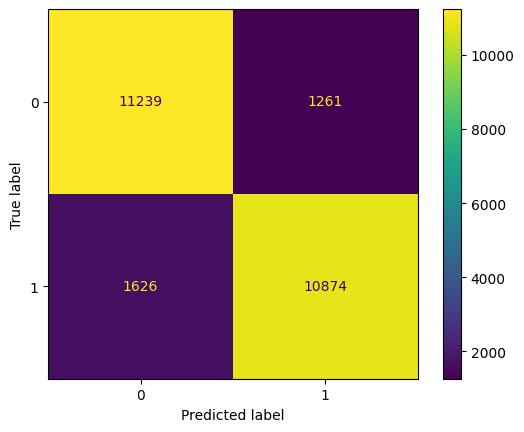

In [7]:
# Generate predictions and display confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()